In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.eq(0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 
        'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

<AxesSubplot:>

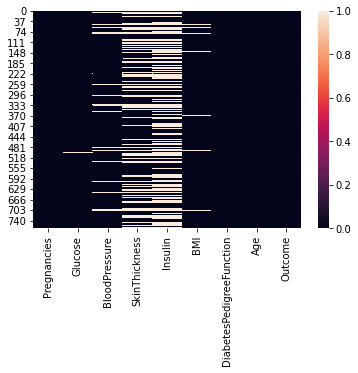

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.fillna(df.mean(), inplace=True)

<AxesSubplot:>

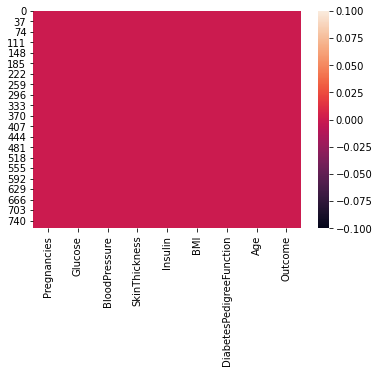

In [11]:
sns.heatmap(df.isnull())

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [13]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


<AxesSubplot:>

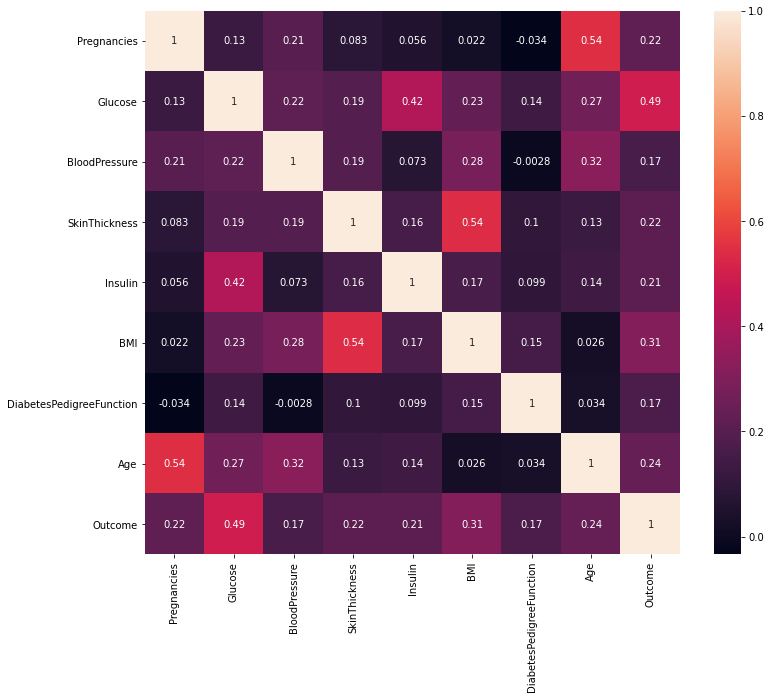

In [14]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

In [15]:
X = df[['Glucose', 'BMI', 'Age']]
y = df['Outcome']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
testKnn = KNeighborsClassifier(n_neighbors=7)

In [20]:
from sklearn.model_selection import cross_val_score

In [21]:
cross_val_score(testKnn, X, y, cv=5, scoring='accuracy')

array([0.76623377, 0.7012987 , 0.74025974, 0.81699346, 0.73856209])

In [22]:
df.shape

(768, 9)

In [23]:
768/5

153.6

In [24]:
153.6*4

614.4

In [25]:
ks = list(range(1, 600, 2))

In [26]:
cvScores = []

In [27]:
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5, scoring='accuracy').mean()
    cvScores.append(score)

In [28]:
cvScores

[0.6784059078176725,
 0.71883541295306,
 0.7396400984636278,
 0.7526695526695526,
 0.7565486800780918,
 0.7604872251931075,
 0.7565571683218743,
 0.7630846277905101,
 0.7630761395467278,
 0.7708768355827178,
 0.7682964094728799,
 0.7643918173329938,
 0.7617774382480265,
 0.7644003055767762,
 0.7669977081741788,
 0.7617859264918089,
 0.7656735421441304,
 0.7604787369493252,
 0.7605042016806722,
 0.7644003055767762,
 0.7644172820643409,
 0.756574144809439,
 0.7578983108394872,
 0.7565911212970036,
 0.7552924199983023,
 0.7592224768695356,
 0.755309396485867,
 0.7579152873270519,
 0.7618113912231559,
 0.7566080977845683,
 0.752703505644682,
 0.756599609540786,
 0.756599609540786,
 0.7605042016806722,
 0.7578983108394872,
 0.7552924199983023,
 0.7592055003819709,
 0.7578898225957049,
 0.7591970121381886,
 0.753993718699601,
 0.7474747474747476,
 0.7539852304558187,
 0.7487819370172311,
 0.752678040913335,
 0.7500806383159324,
 0.7526950174008997,
 0.7513878278584161,
 0.7487904252610134,
 

In [29]:
max(cvScores)

0.7708768355827178

In [30]:
cvScores.index(max(cvScores))

9

In [31]:
ks[9]

19

In [32]:
finalKNN = KNeighborsClassifier(n_neighbors=19)

In [33]:
finalKNN.fit(X, y)

KNeighborsClassifier(n_neighbors=19)

In [34]:
X

,Glucose,BMI,Age
0,148.0,33.6,50
1,85.0,26.6,31
2,183.0,23.3,32
3,89.0,28.1,21
4,137.0,43.1,33
...,...,...,...
763,101.0,32.9,63
764,122.0,36.8,27
765,121.0,26.2,30
766,126.0,30.1,47


In [35]:
import pickle

In [36]:
pickle.dump(finalKNN, open('Diabetes Model.pkl', 'wb'))

In [37]:
loadedModel = pickle.load(open('Diabetes Model.pkl', 'rb'))

In [38]:
loadedModel

KNeighborsClassifier(n_neighbors=19)

In [40]:
loadedModel.predict([[150, 35, 45]])

array([1])

In [41]:
loadedModel.predict_proba([[150, 35, 45]])

array([[0.31578947, 0.68421053]])